# Trabajo final

## Introducción

En el portal de datos abiertos del Ayuntamiento de Madrid se puede encontrar conjuntos de datos sobre multas de circulación que el Ayuntamiento de Madrid tramita cada mes, con todo el detalle posible sobre cada una de ellas que permite la legislación de protección de datos. 


La dirección del portal mencionado es la siguiente:

https://datos.madrid.es

y el enlace donde se encuentran los datos relativos al detalle de las multas de dirculación  es el siguiente:

https://datos.madrid.es/sites/v/index.jsp?vgnextoid=fb9a498a6bdb9410VgnVCM1000000b205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD


En éste último enlace  podemos encontrar los datos de multas por meses desde el año 2014. Se trata de un conjunto de URLs a ficheros en formato `csv`.
En esta práctica __solo nos va a interesar los datos desde junio el 2017__. 

### Metadatos

En cada uno de los ficheros `csv` podemos encontrar los siguientes datos:


| **Campo**         | **Descripción**                                                                                                                         |
| :---------------- | :-------------------------------------------------------------------------------------------------------------------------------------- |
| **CALIFICACION**  | Gravedad de la infracción cometida.                                                |
| **LUGAR**         | Dirección donde se cometió la infracción (calle y número).                                                                       |
| **MES**           | Mes en el que se registró la infracción.                                                                          |
| **ANIO**          | Año en que ocurrió la infracción (por ejemplo, 2019).                                                                                   |
| **HORA**          | Hora del día en la que se registró la infracción (en formato decimal, ej. `10.42`).                                                     |
| **IMP\_BOL**      | Importe de la sanción (en euros).                                                                                             |
| **DESCUENTO**     | Indica si aplica descuento por pronto pago.                                                                           |
| **PUNTOS**        | Número de puntos retirados del carnet de conducir (si aplica).                                                                          |
| **DENUNCIANTE**   | Autoridad o entidad que impuso la sanción.                                               |
| **HECHO-BOL**     | Descripción textual del hecho sancionado. |
| **VEL\_LIMITE**   | Límite de velocidad permitido (en km/h).                                                                |
| **VEL\_CIRCULA**  | Velocidad real a la que circulaba el vehículo (en km/h).                                                      |
| **COORDENADA\_X** | Coordenada X para geolocalizar la infracción.                                                          |
| **COORDENADA\_Y** | Coordenada Y para geolocalización.                                                                          |




## Librerías

Importar todas las librerías necesarias al principio, tal como propone el estilo `pep-8`. Ej.:
<a href="https://www.python.org/dev/peps/pep-0008/">PEP 8 -- Style Guide for Python Code</a>.

In [38]:
# Sol
import numpy as np
import pandas as pd
import requests
import re
from os import listdir
import urllib
import io
from io import StringIO
import matplotlib.pyplot as plt
from pyproj import Transformer
import folium


## ETAPA 1. Análisis exploratorio y consultas.



### La descarga de datos

En este notebook vamos a estudiar únicamente los datos de diciembre  de 2024.
La URL que permite descargar dichos datos es la siguiente:

In [2]:
url = "https://datos.madrid.es/egob/catalogo/210104-395-multas-circulacion-detalle.csv"

Podemos hacer la petición con `request.get()`:

In [3]:
response = requests.get(url)
if response.status_code == 200:
    print(response.url)

https://datos.madrid.es:443/egobfiles/MANUAL/210104/202412detalle.csv


Como podemos observar, el servidor redirige la url `https://datos.madrid.es/egob/catalogo/210104-395-multas-circulacion-detalle.csv` a la url `https://datos.madrid.es:443/egobfiles/MANUAL/210104/202412detalle.csv` correspondiente al mes 12 del año 2024.

Para crear el dataframe con los datos de las multas de tráfico, podríamos usar cualquiera de las dos url's anteriores, pero nos vamos a quedar con la primera, que es la que aparece en el HTML en `datos.madrid.es` :

In [13]:
# Accedemos al texto 
content = io.StringIO(response.text)
multas = pd.read_csv(content, sep =';', encoding = 'latin1')
multas.head()

,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA,COORDENADA-X,COORDENADA-Y
0,LEVE,CL CLARA DEL REY 36,12,2024,20.23,60.0,SI,0,SER,ESTACIONAR CON AUTORIZACIÓN NO VÁLIDA. ...,,,,
1,LEVE,CL CLARA DEL REY 28,12,2024,20.27,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,,,
2,GRAVE,CL CANILLAS 63,12,2024,20.45,200.0,SI,0,SER,ESTACIONAR OBSTACULIZANDO LA UTILIZACIÓN DE UN...,,,,
3,LEVE,CL BRAVO MURILLO 24,12,2024,16.30,60.0,SI,0,SER,ESTACIONAR CON AUTORIZACIÓN NO VÁLIDA. ...,,,,
4,LEVE,CL BRAVO MURILLO 16,12,2024,16.50,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,,,


### Explorar la estructura de los datos en el dataframe

El método `info` devuelve información acerca de la estructura de un dataframe. Ejecuta el método `info()` sobre el dataframe `multas` y comenta los resultados.
Fíjate en las columnas que representan la hora, el día y el año y observa su tipo de datos. ¿Cuántas filas se han cargado?. Fíjate en los valores distintos de `NaN` en cada una de las columnas.

In [5]:
# Solución
multas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249801 entries, 0 to 249800
Data columns (total 14 columns):
 #   Column                                                                                                                                                  Non-Null Count   Dtype  
---  ------                                                                                                                                                  --------------   -----  
 0   CALIFICACION                                                                                                                                            249801 non-null  object 
 1   LUGAR                                                                                                                                                   249801 non-null  object 
 2   MES                                                                                                                                                     2498

Las columnas MES, ANIO y HORA representan el mes, el año y la hora de la multa respectivamente.

Las columnas MES y ANIO son de tipo entero mientras que HORA es de tipo flotante.

Se han cargado 249.801 filas, donde ningun campo contiene valores nulos

###  Exploración de las columnas.

__Se pide:__

__a)__ ¿Cuántos valores distintos hay en la columna `CALIFICACION` del dataframe `multas`? Modifica los valores de dicha columna para que no contengan espacios en blanco. Puedes usar el método  `str.strip()` de la clase Series.

__b)__ ¿Cuántos valores distintos hay en las columnas `DESCUENTO`, `HECHO-BOL` y `DENUNCIANTE` del dataframe `multas`? Modifica los valores de dichas columnas para que no contengan espacios en blanco.

__c)__ Muestra el listado de columnas del dataframe.
* ¿Cuál es el nombre de la columna que representa la velocidad de circulación registrada? Fíjate en el espacio en blanco al final.
* ¿Cuál es el nombre de la columna que representa la coordenada Y de la ubicación geográfica de donde se produce la infracción? Fíjate en la cantidad de espacios en blanco al final.
* Muestra la serie de datos correspondiente a la coordenada Y.
* Usa el método  `rename` de los dataframes para normalizar los nombres de las columnas del dataframe multas, de forma que los nuevos nombres no tengan espacios en blanco al final. Consulta la ayuda del método `rename`; ésta te propone el uso de métodos de la clase `str` a cada elemento del índice de las columnas (o de las filas). En nuestro caso, para eliminar espacios en blanco usaremos el método `str.strip()` sobre el índice de las columnas.
  
__d)__ ¿Observa las columnas relativas a la velocidad. ¿De qué tipo son?. 
¿Cuántos valores distintos hay en las columnas `VEL_LIMITE`, `VEL_CIRCULA`. Por último, estudia la función `pd.to_numeric` de pandas y úsala para transformar el tipo de las columnas  anteriores a tipo numérico.

__e)__ ¿Observa las columnas relativas a la geolocalización. ¿De qué tipo son?. Usa la función `pd.to_numeric` de pandas para transformar el tipo de las columnas  `COORDENADA-X`, `COORDENADA-Y` a tipo numérico.

El dataframe obtenido después de aplicar todas las transformaciones anteriores 

In [15]:
# Solución
#a)
multas['CALIFICACION'] = multas['CALIFICACION'].str.strip()
print('Valores Distintos de CALIFICACION: ',multas['CALIFICACION'].value_counts())
# b)
multas['DESCUENTO'] = multas['DESCUENTO'].str.strip()
multas['HECHO-BOL'] = multas['HECHO-BOL'].str.strip()
multas['DENUNCIANTE'] = multas['DENUNCIANTE'].str.strip()

print('Valores Distintos de CALIFICACION: ',multas['DESCUENTO'].value_counts())
print('Valores Distintos de CALIFICACION: ',multas['HECHO-BOL'].value_counts())
print('Valores Distintos de CALIFICACION: ',multas['DENUNCIANTE'].value_counts())

#C)
print('Columnas del dataframe: ',multas.columns)
print('Columna coordenada Y: "COORDENADA-Y                                                                                                                                          "')
print('Coordenadas Y del dataframe',multas['COORDENADA-Y                                                                                                                                          '])
multas.columns = multas.columns.str.strip()

#d)
print('tipo de dato de la columna VEL_LIMITE', multas['VEL_LIMITE'].dtype)
print('tipo de dato de la columna VEL_CIRCULA', multas['VEL_CIRCULA'].dtype)

multas['VEL_LIMITE'] = pd.to_numeric(multas['VEL_LIMITE'], errors='coerce')
multas['VEL_CIRCULA'] =  pd.to_numeric(multas['VEL_CIRCULA'], errors = 'coerce')
# e)
print('tipo de dato de la columna COORDENADA-X', multas['COORDENADA-X'].dtype)
print('tipo de dato de la columna COORDENADA-Y', multas['COORDENADA-Y'].dtype)

multas['COORDENADA-X'] = pd.to_numeric(multas['COORDENADA-X'].str.strip(), errors='coerce')
multas['COORDENADA-Y'] =  pd.to_numeric(multas['COORDENADA-Y'].str.strip(), errors = 'coerce')


Valores Distintos de CALIFICACION:  CALIFICACION
GRAVE        157605
LEVE          91388
MUY GRAVE       808
Name: count, dtype: int64
Valores Distintos de CALIFICACION:  DESCUENTO
SI    249801
Name: count, dtype: int64
Valores Distintos de CALIFICACION:  HECHO-BOL
NO RESPETAR LAS RESTRICCIONES DE CIRCULACIÓN DERIVADAS DE MADRID ZBE                                                    60650
NO RESPETAR LAS RESTRICCIONES DE CIRCULACIÓN DERIVADAS DE LA ZBE DE ESPECIAL PROTECCIÓN DISTRITO CENTRO                 47396
ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓN, EN LUGAR HABILITADO PARA EL ESTACIONAMIENTO CON LIMITACIÓN HORARIA.    31907
SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITADAS EN 60 KM/H O MÁS.                                                      16254
ESTACIONAR EN LUGAR PROHIBIDO.                                                                                          13176
                                                                                                        

### Creación de columna nueva

__a)__ A partir del dataframe `multas` que contiene las columnas `MES`, `ANIO` y `HORA`, crear una nueva columna llamada `fecha` de tipo datetime que combine dicha información en un único objeto de fecha y hora. Usa como día el día 1.

__b)__ Modifica el dataframe `multas` de forma que el índice sea el valor de la columna creada anteriormente.

__c)__ Elimina del dataframe la columna `fecha`.



In [16]:
# a)
# Como las horas estan en flotante se separan horas y minutos
horas = multas['HORA'].fillna(0).astype(int)   
minutos = ((multas['HORA'] - horas) * 100).astype(int) 

multas['FECHA'] = pd.to_datetime(
    #Aqui no use diccionario por warning
    pd.DataFrame({
                "year": multas["ANIO"],
                "month": multas["MES"],
                "day": 1,
                "hour": horas,
                "minute": minutos
            }))

# # b)
multas = multas.set_index(multas['FECHA'])

# #c)
multas = multas.drop(columns='FECHA')

## Consultas

El dataframe obtenido después de aplicar todas las transformaciones de la sección anterior se considera límpio. Usando dicho dataframe, se pide realizar las siguientes consultas: 


### C1
Crear un nuevo dataframe llamado `multas_hora` que contenga el número de multas registradas por hora. Muestra cómo evoluciona el número de multas a lo largo del tiempo mediante un gráfico de líneas como el que se muestra:

<div align="center">
<img src="porhora.png" alt="hora" style="width: 60%;">
</div>

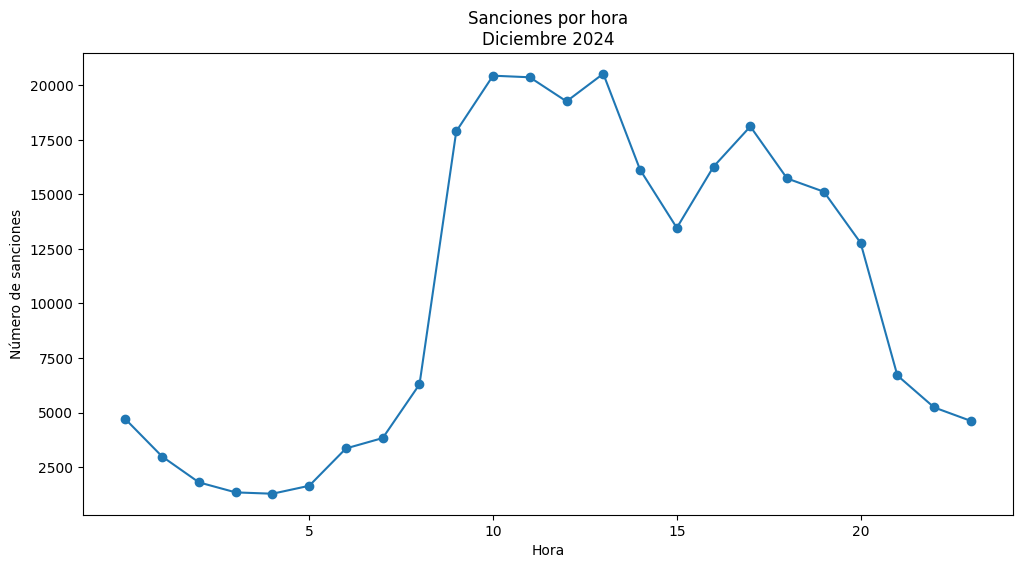

In [18]:
multas_hora = multas['HORA'].astype(int).value_counts().sort_index()
plt.figure(figsize=(12,6))
plt.plot(multas_hora.index, multas_hora.values.tolist(), label='Registros',marker='o')

plt.title("Sanciones por hora\nDiciembre 2024")
plt.xlabel("Hora")
plt.ylabel("Número de sanciones")
plt.rcParams['axes.formatter.useoffset'] = False #para no ver los formatos cientificaos
plt.xticks(ticks=range(5, 25, 5))  
plt.show()

### C2 
Crea un dataframe que contenga información del número de multas por calificación. Muestra también la información mediante un diagrama de barras limilar al que se muestra:

<div align="center">
<img src="barras_cal.png" alt="hora" style="width: 60%;">
</div>

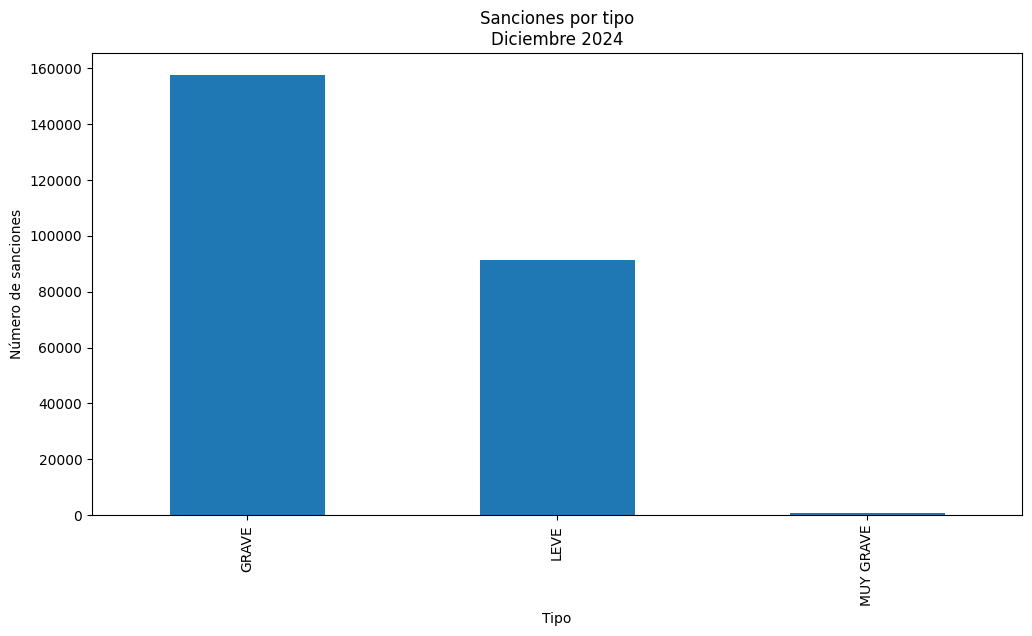

In [19]:
# Sol 
multasxtipo = multas['CALIFICACION'].value_counts().sort_index()
plt.figure(figsize=(12,6))
multasxtipo.plot(kind='bar')

plt.title("Sanciones por tipo\nDiciembre 2024")
plt.xlabel("Tipo")
plt.ylabel("Número de sanciones")
plt.rcParams['axes.formatter.useoffset'] = False

plt.show()

### C3
 
En este ejercicio se analizará cómo evoluciona el número de multas por hora en función de su calificación (LEVE, GRAVE o MUY GRAVE). Crear un nuevo dataframe llamado `multas_hora_tipo` que contenga el número de multas registradas por hora y calificación. Muestra cómo evoluciona el número de multas a lo largo del tiempo mediante un gráfico de líneas como el que se muestra:

<div align="center">
<img src="porhora_tipo.png" alt="hora" style="width: 60%;">
</div>

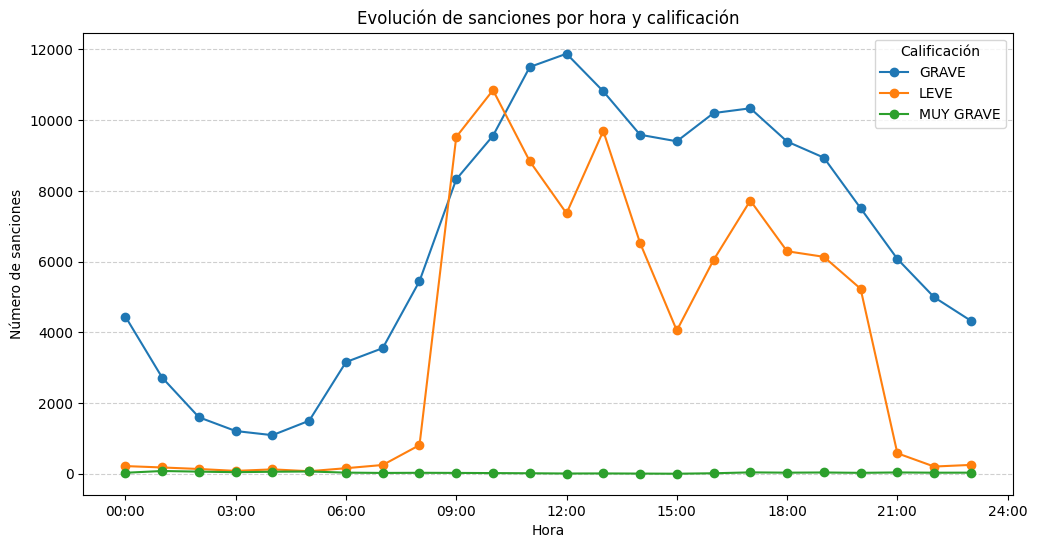

In [23]:
# Sol
multas_hora_tipo = multas[['CALIFICACION','HORA']].copy()
multas_hora_tipo['HORA_INT'] = multas_hora_tipo['HORA'].astype(int)

conteo_tipo = multas_hora_tipo.groupby(['HORA_INT', 'CALIFICACION']).size().unstack(fill_value=0)

plt.figure(figsize=(12,6))

for calificacion in conteo_tipo.columns:
    plt.plot(conteo_tipo.index, conteo_tipo[calificacion],marker='o',label=calificacion)

plt.title("Evolución de sanciones por hora y calificación")
plt.xlabel("Hora")
plt.ylabel("Número de sanciones")
plt.legend(title="Calificación")
horas_ticks = range(0, 25, 3)
plt.xticks(horas_ticks, [f"{h:02d}:00" for h in horas_ticks])
plt.rcParams['axes.formatter.useoffset'] = False
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

### C4
Vamos a comparar comparar la velocidad límite de la vía con la velocidad real registrada en cada infracción. Utiliza un diagrama de dispersión (scatter) en el que el eje X represente la velocidad límite, y el eje Y represente la velocidad registrada. Por ejemplo:
<div align="center">
<img src="velocidades.png" alt="hora" style="width: 60%;">
</div>

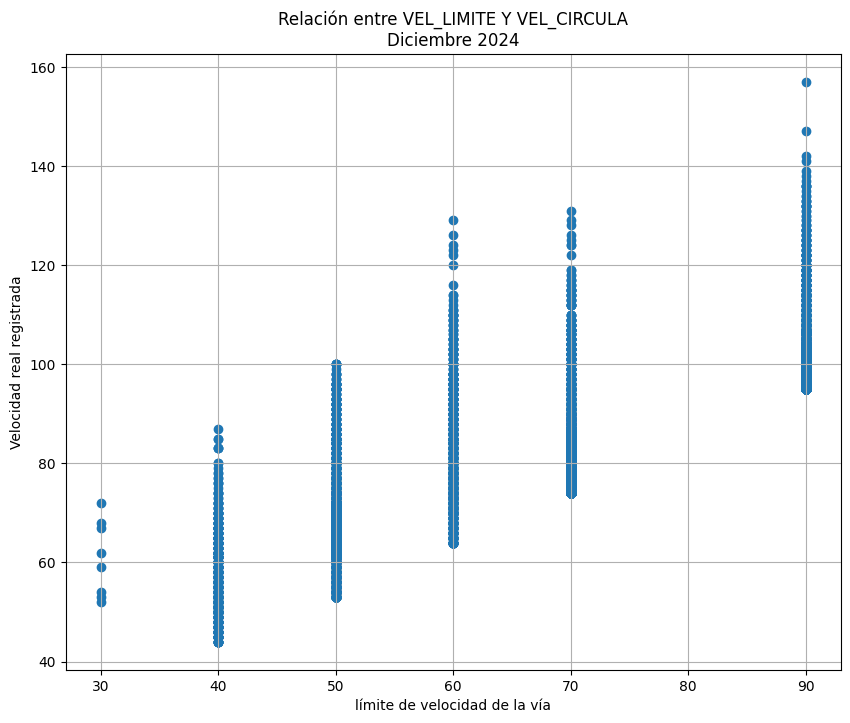

In [26]:
# Sol:
multas_vel=multas[['VEL_LIMITE','VEL_CIRCULA']].copy()

plt.figure(figsize=(10,8))

plt.scatter(multas_vel['VEL_LIMITE'], multas_vel['VEL_CIRCULA'])

max_vel = max(multas_vel['VEL_LIMITE'].max(), multas_vel['VEL_CIRCULA'].max())

plt.title("Relación entre VEL_LIMITE Y VEL_CIRCULA\nDiciembre 2024")
plt.xlabel("límite de velocidad de la vía")
plt.ylabel("Velocidad real registrada")
plt.grid()

plt.show()

### C5

Encuentra la mayor diferencia en % de velocidad entre la velocidad permitida y a la que se circulaba: (vel_circula-vel_limite)/vel_limite. 

(Sol: A las 17:22, en AV TRECE ROSAS FAROLA 69, se produce una infracción por SOBREPASAR LA VELOCIDAD MÁXIMA. 72Km/h en vía limitada a 30km/h)

In [27]:
# Sol
multas['VEL_DIFF'] = (multas['VEL_CIRCULA'] - multas['VEL_LIMITE'])/multas['VEL_LIMITE']
registro_max = multas[['VEL_DIFF', 'LUGAR','HORA' ,'VEL_CIRCULA', 'VEL_LIMITE']].dropna(subset=['VEL_DIFF']).nlargest(1, 'VEL_DIFF')

registro = registro_max.iloc[0]
hora = registro['HORA']  
lugar = registro['LUGAR'].strip()
vel_circula = int(registro['VEL_CIRCULA'])
vel_limite = int(registro['VEL_LIMITE'])

mensaje = (f"Sol: A las {hora}, en {lugar}, se produce una infracción por SOBREPASAR LA VELOCIDAD MÁXIMA. "
           f"{vel_circula}Km/h en vía limitada a {vel_limite}km/h")

print(mensaje)


Sol: A las 17.22, en AV TRECE ROSAS FAROLA 69, se produce una infracción por SOBREPASAR LA VELOCIDAD MÁXIMA. 72Km/h en vía limitada a 30km/h


### C6
__a)__ Crear un nuevo dataframe llamado `resumen_lugar` que contenga la información del número de multas y la recaudación total de las multas agrupadas por dirección.  Este dataframe debe contener además la información del punto medio de las coordenadas geográficas de cada dirección. El resultado será algo del estilo:

|LUGAR 	|num_multas 	|recaudacion 	|latitud media del lugar 	|longitud media del lugar|
|:----|:------:|----:|:---:|:--:|
| 	CALLE ALCALA 51 	| 7440|  	1488000.0 	| 4474540.0 	| 441089.56| 
|  	CALLE GRAN VIA 71 | 	5355 | 	1071000.0|  	4474951.5 	| 439718.47| 
|  	CALLE ATOCHA 125 	| 4345|  	869000.0 	| 4473465.0 	| 441189.90| 
| 	A42PK5.750 ENT C1 	| 3423|  	683830.0 	| 4469061.0 	| 438863.81| 

__b)__ Crear un DataFrame con las 500 localizaciones con mayor número de multas. El nuevo dataframe ha de llamarse `resumen_lugar_500`.



In [34]:
# sol:
# a)
resumen_lugar = multas.groupby('LUGAR').agg(
    num_multas = ('LUGAR', 'size'),       
    recaudacion_total = ('IMP_BOL', 'sum'),   
    X_promedio = ('COORDENADA-X', 'mean'),   
    Y_promedio = ('COORDENADA-Y', 'mean')    
).dropna().sort_values(by='num_multas', ascending=False).reset_index()

resumen_lugar.head(4)
# resumen_lugar.sort_values(by='num_multas', ascending=False).head(4)


,LUGAR,num_multas,recaudacion_total,X_promedio,Y_promedio
0,CALLE ALCALA 51,7440,1488000.0,441089.56,4474540.0
1,CALLE GRAN VIA 71,5355,1071000.0,439718.47,4474951.5
2,CALLE ATOCHA 125,4345,869000.0,441189.90,4473465.0
3,A42PK5.750 ENT C1,3423,683830.0,438863.81,4469061.0


In [36]:
# b)
resumen_lugar_500 = resumen_lugar.nlargest(500,'num_multas')
resumen_lugar_500

,LUGAR,num_multas,recaudacion_total,X_promedio,Y_promedio
0,CALLE ALCALA 51,7440,1488000.0,441089.560000,4.474540e+06
1,CALLE GRAN VIA 71,5355,1071000.0,439718.470000,4.474952e+06
2,CALLE ATOCHA 125,4345,869000.0,441189.900000,4.473465e+06
3,A42PK5.750 ENT C1,3423,683830.0,438863.810000,4.469061e+06
4,CALLE SAN BERNARDO 91,3348,669600.0,440099.560000,4.475626e+06
...,...,...,...,...,...
495,"PZ COLON, 1",9,1110.0,4413.947778,4.475431e+04
496,"VENTURA RODRIGUEZ, 5",8,1600.0,4393.153750,4.475327e+04
497,PO FRANCISCO DE SALES 33 C1,8,1600.0,439533.380000,4.477107e+06
498,"VENTURA RODRIGUEZ, 3",8,1600.0,4393.133750,4.475315e+04


### C7


A partir del dataframe `resumen_500` calculado anteriormente, vamos a representar en un mapa de madrid los puntos donde se ocurren las infracciones. Estudiar y ejecutar el siguiente código:

In [39]:

print(folium.__version__)

0.20.0


In [41]:
# Convertir coordenadas proyectadas (UTM) a lat/lon
transformer = Transformer.from_crs("epsg:25830", "epsg:4326")  # ETRS89/UTM30N -> WGS84
resumen_lugar_500[['lat', 'lon']] = resumen_lugar_500.apply(lambda row: pd.Series(transformer.transform(row['X_promedio'], row['Y_promedio'])), axis=1)
resumen_lugar_500.head()

,LUGAR,num_multas,recaudacion_total,X_promedio,Y_promedio,lat,lon
0,CALLE ALCALA 51,7440,1488000.0,441089.56,4474540.0,40.419403,-3.694408
1,CALLE GRAN VIA 71,5355,1071000.0,439718.47,4474951.5,40.423012,-3.710607
2,CALLE ATOCHA 125,4345,869000.0,441189.90,4473465.0,40.409726,-3.693126
3,A42PK5.750 ENT C1,3423,683830.0,438863.81,4469061.0,40.369885,-3.720116
4,CALLE SAN BERNARDO 91,3348,669600.0,440099.56,4475625.5,40.429111,-3.706179


`pyproj`  se usa para trabajar con sistemas de coordenadas geográficas, mientras que `Transformer` permite convertir coordenadas entre diferentes sistemas de referencia (por ejemplo, de coordenadas UTM a latitud/longitud WGS84).

El siguiente fragmento de código nos va a permitir dibujar en el mapa (centrado en la Puerta del Sol), puntos de color rojo, con tamaño proporcional al número de multas registradas.

In [43]:
# Crear mapa centrado en la puerta del sol Madrid 
lat_centro = 40.416729
lon_centro = -3.703339
# Creamos el mapa
m = folium.Map(location=[lat_centro, lon_centro], zoom_start=12)

# Añadir puntos rojos proporcional al número de multas
for idx, row in resumen_lugar_500.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius = max(1,np.log2(row['num_multas'])), # tamaño proporcional al número de multas (para suavizar))
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=f"{row['LUGAR']}\nMultas: {row['num_multas']}\nRecaudación: {row['recaudacion_total']}€\n"
    ).add_to(m)

# Guardar mapa
name = "mapa_multas_madrid.html"
m.save(name)
print(f"Se ha generado el mapa: {name} para visualizar en el navegador")

Se ha generado el mapa: mapa_multas_madrid.html para visualizar en el navegador


__Se pide:__

Mostrar la información de las multas en un mapa usando folium. Distinguir los puntos dependiendo de  la calificación de las multas, por ejemplo, puntos rojos para las graves (máximo 500) y verdes para las leves.

In [46]:
# Sol 
multas_mapeables = multas.dropna(subset='COORDENADA-X')
multas_mapeables = multas_mapeables.sample(n=500, random_state=42)

transformer = Transformer.from_crs("epsg:25830", "epsg:4326")  # ETRS89/UTM30N -> WGS84
multas_mapeables[['lat', 'lon']] = multas_mapeables.apply(lambda row: pd.Series(transformer.transform(row['COORDENADA-X'], row['COORDENADA-Y'])), axis=1)

print('Severidades mostradas:',multas_mapeables.CALIFICACION.nunique())

# Crear mapa centrado en la puerta del sol Madrid 
lat_centro = 40.416729
lon_centro = -3.703339
# Creamos el mapa
m = folium.Map(location=[lat_centro, lon_centro], zoom_start=12)

severity_map={
    'MUY GRAVE':'red',
    'GRAVE':'yellow',
    'LEVE':'green'
}

for idx, row in multas_mapeables.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        # radius = max(1,np.log2(row['num_multas'])), # tamaño proporcional al número de multas (para suavizar))
        color=severity_map.get(row['CALIFICACION']),
        fill=True,
        fill_color=severity_map.get(row['CALIFICACION']),
        fill_opacity=0.6,
         popup=f"{row['CALIFICACION']}"
    ).add_to(m)

# Guardar mapa
name = "mapa_multas_madrid_full.html"
m.save(name)
print(f"Se ha generado el mapa: {name} para visualizar en el navegador")



Severidades mostradas: 2
Se ha generado el mapa: mapa_multas_madrid_full.html para visualizar en el navegador


### C8

La columna DENUNCIANTE tiene información acerca de la entidad que ha realizado la denuncia. Calcula la frecuencia de cada uno de los tipos de denunciante. Dibuja un diagrama de barras ordenado de mayor a menor. Por ejemplo:

<div align="center">
<img src="pordenunciante.png" alt="hora" style="width: 80%;">
</div>

<Figure size 640x480 with 0 Axes>

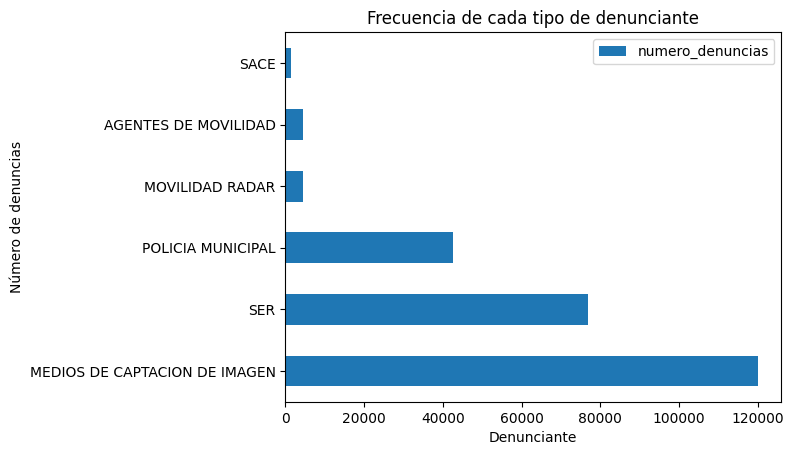

In [ ]:
# Sol
multas_entidad = multas.groupby('DENUNCIANTE').agg(
    numero_denuncias = ('DENUNCIANTE','count')
).reset_index().sort_values('numero_denuncias',ascending=False)

plt.figure()
multas_entidad.plot(kind='barh',x='DENUNCIANTE',y='numero_denuncias')

plt.title("Frecuencia de cada tipo de denunciante")
plt.xlabel("Denunciante")
plt.ylabel("Número de denuncias")

plt.show()


### C9

De todas las multas tramitadas, ¿cuántas han sido tramitadas por agentes de movilidad? Crea un nuevo dataframe que contenga solo las multas tramitadas por agentes de movilidad.

In [52]:
# Sol
multas_movilidad = multas[multas['DENUNCIANTE'] == 'AGENTES DE MOVILIDAD']
print('La cantidad de multas tramitadas por agentes de movilidad son: ', multas_movilidad.size)

La cantidad de multas tramitadas por agentes de movilidad son:  66210


### C10

En este ejercicio se analizará cómo evoluciona el número de multas por hora en función del denunciante. Crear un nuevo dataframe llamado `multas_hora_denunciante` que contenga el número de multas registradas por hora y denunciante. Muestra cómo evoluciona el número de multas a lo largo del tiempo mediante un gráfico de líneas como el que se muestra:

<div align="center">
<img src="porhora_denunciante.png" alt="hora" style="width: 60%;">
</div>



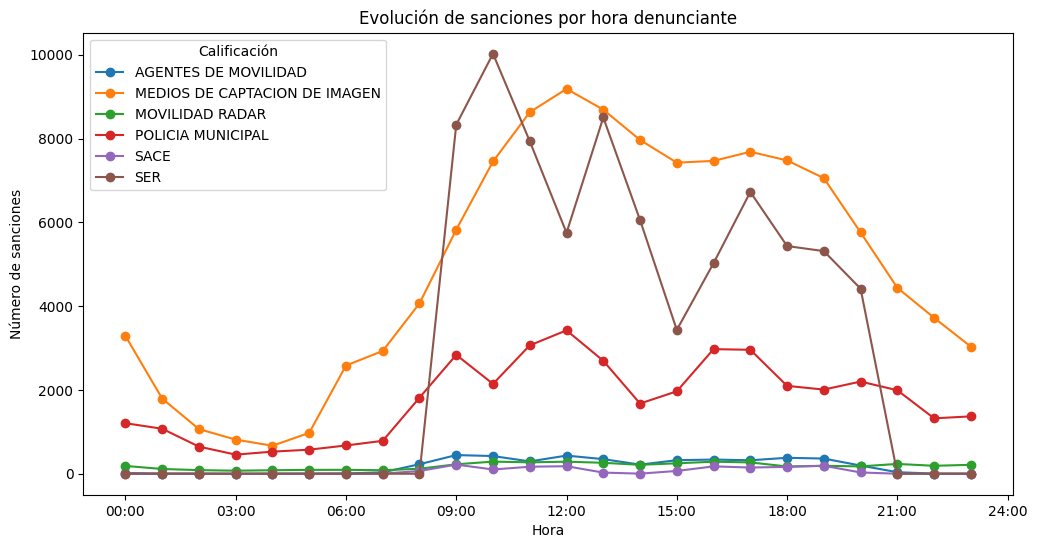

In [55]:
# Solución
multas_hora_denunciante = multas[['DENUNCIANTE','HORA']].copy()
multas_hora_denunciante['HORA_INT'] = multas_hora_denunciante['HORA'].astype(int)

conteo_tipo = multas_hora_denunciante.groupby(['HORA_INT', 'DENUNCIANTE']).size().unstack(fill_value=0)

plt.figure(figsize=(12,6))

for calificacion in conteo_tipo.columns:
    plt.plot(conteo_tipo.index, conteo_tipo[calificacion],marker='o',label=calificacion)

plt.title("Evolución de sanciones por hora denunciante")
plt.xlabel("Hora")
plt.ylabel("Número de sanciones")
plt.legend(title="Calificación")

horas_ticks = range(0, 25, 3)
plt.xticks(horas_ticks, [f"{h:02d}:00" for h in horas_ticks])
plt.show()


### C11

¿Cuánto dinero (como máximo) se ha recaudado en el mes de Diciembre de 2024 con el cobro de las multas? Una multa puede tener descuento por pronto pago del 50%, pero cabe la posibilidad de que el infractor no realice el pago en fecha para acojerse a dicho descuento. Si a ninguna de las multas se aplica el descuento, el importe máximo recaudado será la suma de todos los importes.


In [56]:
#sol
max_value= multas['IMP_BOL'].sum()
print('El dinero máximo recaudado en diciembre de 2024 fue: ' ,max_value)


El dinero máximo recaudado en diciembre de 2024 fue:  37005230.0


### C12
¿Cuánto dinero se ha recaudado (máximo y mínimo) y cuántas multas se han tramitado   por tipo de tramitador?. Una multa puede tener descuento por pronto pago del 50%, pero cabe la posibilidad de que el infractor no realice el pago en fecha para acojerse a dicho descuento.

In [58]:
multas['PRECIO_FINAL'] = np.where(
    multas['DESCUENTO'] == 'SI',
    multas['IMP_BOL'] * 0.5,
    multas['IMP_BOL']
)

dinero_tramitador = multas.groupby('DENUNCIANTE').agg(
    min_recaudo = ('PRECIO_FINAL','sum'),
    max_recaudo = ('IMP_BOL', 'sum'),
    cant_multas = ('DENUNCIANTE', 'size')
).reset_index()
dinero_tramitador

,DENUNCIANTE,min_recaudo,max_recaudo,cant_multas
0,AGENTES DE MOVILIDAD,270780.0,541560.0,4414
1,MEDIOS DE CAPTACION DE IMAGEN,11991060.0,23982120.0,119981
2,MOVILIDAD RADAR,230300.0,460600.0,4452
3,POLICIA MUNICIPAL,2815150.0,5630300.0,42480
4,SACE,123215.0,246430.0,1533
5,SER,3072110.0,6144220.0,76941


------------------